In [1]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]
len(sentences)

9

In [3]:
model = Word2Vec(sentences, min_count=1)

In [4]:
model['this']

/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/xpython_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


array([ 0.00069911,  0.00040512, -0.00346293, -0.00156394,  0.00246856,
       -0.00031617,  0.00098003,  0.00221373, -0.00429625,  0.0027753 ,
       -0.00080828,  0.00404166, -0.0011757 ,  0.00365092, -0.00282005,
        0.00407567,  0.00221282,  0.00105117, -0.00122146, -0.00153107,
       -0.00357228, -0.00214495, -0.00015409,  0.00084367,  0.00337343,
       -0.00220576,  0.00456637,  0.00184144,  0.00068724,  0.00378665,
        0.00224986, -0.0038982 , -0.00435301, -0.0049671 , -0.00362165,
        0.00147438,  0.0009799 , -0.00034714, -0.00350426,  0.00295017,
        0.0039954 , -0.00130205,  0.00387679,  0.00465864,  0.00036108,
        0.00421953, -0.00158188,  0.00285975,  0.00076934,  0.00498408,
       -0.00120539,  0.00435945, -0.00317483,  0.00061158,  0.0047761 ,
        0.00379747,  0.00319613,  0.00470522,  0.0036086 , -0.00123609,
        0.00151566, -0.00162969, -0.00070906,  0.00214435, -0.00137228,
        0.00355146,  0.00150422, -0.00304429, -0.00216352,  0.00

In [5]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [6]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model)) 
len(X)

/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/xpython_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return args.f
/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/xpython_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from xpython import launch as _xpython_launch


9

In [9]:
print(model[model.wv.vocab])

[[-4.8394892e-03  2.8526131e-03  1.1120027e-04 ... -2.9088019e-03
   2.2468816e-03  3.9048828e-04]
 [ 1.3363155e-03  2.1877284e-03 -1.9368880e-03 ... -1.4599030e-03
   2.7004939e-03  2.5335059e-03]
 [-1.7883988e-03 -2.2870582e-03 -2.5777083e-03 ...  1.7119055e-03
  -4.7265571e-03 -4.8198405e-04]
 ...
 [ 3.0105477e-03 -3.3034931e-04  3.5170601e-03 ... -7.6599878e-05
  -3.8101412e-03 -4.1205655e-03]
 [ 1.7311882e-04  3.8349694e-03 -2.9874528e-03 ... -8.6426002e-04
   3.0399130e-03  3.9102118e-03]
 [ 4.8104618e-03  2.9913429e-03 -2.3981014e-03 ... -3.1949703e-03
   4.3148472e-04  2.2868966e-03]]


/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
print (model.similarity('post', 'book'))
print (model.most_similar(positive=['machine'], negative=[], topn=3))

0.15026195
[('new', 0.21235886216163635), ('about', 0.18596135079860687), ('is', 0.11478959023952484)]


/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/rhythmsyed/miniconda3/envs/entitylink/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [13]:
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print(assigned_clusters)

for index, sentence in enumerate(sentences):    
    print(str(assigned_clusters[index]) + ":" + str(sentence))

[1, 1, 0, 0, 0, 0, 1, 1, 1]
1:['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
1:['this', 'is', 'another', 'book']
0:['one', 'more', 'book']
0:['weather', 'rain', 'snow']
0:['yesterday', 'weather', 'snow']
0:['forecast', 'tomorrow', 'rain', 'snow']
1:['this', 'is', 'the', 'new', 'post']
1:['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
1:['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


In [15]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (len(centroids))

Cluster id labels for inputted data
[1 1 1 0 0 0 1 1 1]
Centroids data
2


In [16]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.0007451113265919113


In [17]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.31458625


1 ['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
1 ['this', 'is', 'another', 'book']
0 ['one', 'more', 'book']
0 ['weather', 'rain', 'snow']
0 ['yesterday', 'weather', 'snow']
0 ['forecast', 'tomorrow', 'rain', 'snow']
1 ['this', 'is', 'the', 'new', 'post']
1 ['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
1 ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


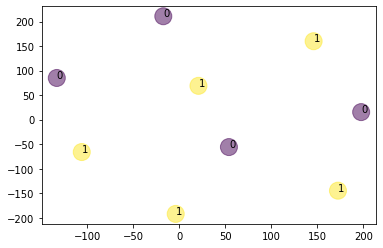

In [21]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)

for j in range(len(sentences)):    
    plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
    print ("%s %s" % (assigned_clusters[j],  sentences[j]))

plt.show()